In [1]:
import scipy.io as scy
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

In [2]:
#load features
DLPCNN = scy.loadmat('/Users/shriv/Documents/ML Project/Datasets/Basics/Feature/DLP-CNN.mat')
Gabor = scy.loadmat('/Users/shriv/Documents/ML Project/Datasets/Basics/Feature/Gabor.mat')
Hog = scy.loadmat('/Users/shriv/Documents/ML Project/Datasets/Basics/Feature/HOG.mat')
baseDCNN = scy.loadmat('/Users/shriv/Documents/ML Project/Datasets/Basics/Feature/baseDCNN.mat')

In [3]:
#read train and test samples
DLPCNN_train = DLPCNN['DLP_train']
DLPCNN_test = DLPCNN['DLP_test']
Gabor_train = Gabor['GAB_train']
Gabor_test = Gabor['GAB_test']
Hog_train = Hog['HOG_train']
Hog_test = Hog['HOG_test']
baseDCNN_train = baseDCNN['baseDCNN_train']
baseDCNN_test = baseDCNN['baseDCNN_test']

In [4]:
#read true labels
labels = pd.read_table('/Users/shriv/Documents/ML Project/Datasets/Basics/EmoLabel/list_patition_label.txt', sep=' ', header=None)

In [5]:
#separate train and test labels
train_labels = {}
test_labels = {}
for index, row in labels.iterrows():
    if 'train' in row[0]:
        split_id = row[0].split('_')[1].split('.')[0]
        train_labels.update({split_id: row[1]})
    elif 'test' in row[0]:
        split_id = row[0].split('_')[1].split('.')[0]
        test_labels.update({split_id: row[1]})
        
train_classes = [-1]*len(train_labels)
for k, v in train_labels.items():
    train_classes[int(k)-1] = v

test_classes = [-1]*len(test_labels)
for k, v in test_labels.items():
    test_classes[int(k)-1] = v

In [6]:
print(Counter(train_classes))
print(Counter(test_classes))

Counter({4: 4772, 7: 2524, 5: 1982, 1: 1290, 3: 717, 6: 705, 2: 281})
Counter({4: 1185, 7: 680, 5: 478, 1: 329, 6: 162, 3: 160, 2: 74})


In [7]:
#initialize base models with default params
lr = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()
svc = SVC()
mlp = MLPClassifier()

In [8]:
#train models on DLPCNN features
lr_fit_DLPCNN = lr.fit(DLPCNN_train, train_classes)

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
knn_fit_DLPCNN = knn.fit(DLPCNN_train, train_classes)

In [10]:
rf_fit_DLPCNN = rf.fit(DLPCNN_train, train_classes)

In [11]:
gnb_fit_DLPCNN = gnb.fit(DLPCNN_train, train_classes)

In [12]:
svc_fit_DLPCNN = svc.fit(DLPCNN_train, train_classes)

In [13]:
mlp_fit_DLPCNN = mlp.fit(DLPCNN_train, train_classes)

In [14]:
#test models on DLPCNN features
lr_pred_DLPCNN = lr_fit_DLPCNN.predict(DLPCNN_test)

In [15]:
knn_pred_DLPCNN = knn_fit_DLPCNN.predict(DLPCNN_test)

In [16]:
rf_pred_DLPCNN = rf_fit_DLPCNN.predict(DLPCNN_test)

In [17]:
gnb_pred_DLPCNN = gnb_fit_DLPCNN.predict(DLPCNN_test)

In [18]:
svc_pred_DLPCNN = svc_fit_DLPCNN.predict(DLPCNN_test)

In [19]:
mlp_pred_DLPCNN = mlp_fit_DLPCNN.predict(DLPCNN_test)

In [20]:
#evaluate models on DLPCNN features
lr_DLPCNN_f1 = f1_score(test_classes, lr_pred_DLPCNN, average='weighted')
lr_DLPCNN_f1

0.8228283015963408

In [21]:
knn_DLPCNN_f1 = f1_score(test_classes, knn_pred_DLPCNN, average='weighted')
knn_DLPCNN_f1

0.8208182613029249

In [22]:
rf_DLPCNN_f1 = f1_score(test_classes, rf_pred_DLPCNN, average='weighted')
rf_DLPCNN_f1

0.823480855725439

In [23]:
gnb_DLPCNN_f1 = f1_score(test_classes, gnb_pred_DLPCNN, average='weighted')
gnb_DLPCNN_f1

0.72164344828669

In [24]:
svc_DLPCNN_f1 = f1_score(test_classes, svc_pred_DLPCNN, average='weighted')
svc_DLPCNN_f1

0.8262417477668736

In [25]:
mlp_DLPCNN_f1 = f1_score(test_classes, mlp_pred_DLPCNN, average='weighted')
mlp_DLPCNN_f1

0.8222518527038066

In [26]:
#train models on Gabor features
lr_fit_Gabor = lr.fit(Gabor_train, train_classes)

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
knn_fit_Gabor = knn.fit(Gabor_train, train_classes)

In [30]:
rf_fit_Gabor = rf.fit(Gabor_train, train_classes)

In [31]:
gnb_fit_Gabor = gnb.fit(Gabor_train, train_classes)


In [32]:
svc_fit_Gabor = svc.fit(Gabor_train, train_classes)


In [33]:
mlp_fit_Gabor = mlp.fit(Gabor_train, train_classes)


In [34]:
#test models on Gabor features
lr_pred_Gabor = lr_fit_Gabor.predict(Gabor_test)


In [35]:
knn_pred_Gabor = knn_fit_Gabor.predict(Gabor_test)


In [36]:
rf_pred_Gabor = rf_fit_Gabor.predict(Gabor_test)


In [37]:
gnb_pred_Gabor = gnb_fit_Gabor.predict(Gabor_test)


In [38]:
svc_pred_Gabor = svc_fit_Gabor.predict(Gabor_test)


In [39]:
mlp_pred_Gabor = mlp_fit_Gabor.predict(Gabor_test)


In [40]:
#evaluate models on Gabor features
lr_Gabor_f1 = f1_score(test_classes, lr_pred_Gabor, average='weighted')
lr_Gabor_f1

0.7552190324960891

In [41]:
knn_Gabor_f1 = f1_score(test_classes, knn_pred_Gabor, average='weighted')
knn_Gabor_f1

0.5823729297976463

In [42]:
rf_Gabor_f1 = f1_score(test_classes, rf_pred_Gabor, average='weighted')
rf_Gabor_f1

0.6064193571701396

In [43]:
gnb_Gabor_f1 = f1_score(test_classes, gnb_pred_Gabor, average='weighted')
gnb_Gabor_f1

0.5165551551335968

In [44]:
svc_Gabor_f1 = f1_score(test_classes, svc_pred_Gabor, average='weighted')
svc_Gabor_f1

0.7553352469301444

In [45]:
mlp_Gabor_f1 = f1_score(test_classes, mlp_pred_Gabor, average='weighted')
mlp_Gabor_f1

0.7655881824342954

In [46]:
#train models on Hog features
lr_fit_Hog = lr.fit(Hog_train, train_classes)


/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
knn_fit_Hog = knn.fit(Hog_train, train_classes)


In [48]:
rf_fit_Hog = rf.fit(Hog_train, train_classes)


In [49]:
gnb_fit_Hog = gnb.fit(Hog_train, train_classes)


In [50]:
svc_fit_Hog = svc.fit(Hog_train, train_classes)


In [51]:
mlp_fit_Hog = mlp.fit(Hog_train, train_classes)


In [52]:
#test models on HOG features
lr_pred_Hog = lr_fit_Hog.predict(Hog_test)


In [53]:
knn_pred_Hog = knn_fit_Hog.predict(Hog_test)


In [54]:
rf_pred_Hog = rf_fit_Hog.predict(Hog_test)


In [55]:
gnb_pred_Hog= gnb_fit_Hog.predict(Hog_test)


In [56]:
svc_pred_Hog = svc_fit_Hog.predict(Hog_test)


In [57]:
mlp_pred_Hog = mlp_fit_Hog.predict(Hog_test)


In [58]:
#evaluate models on Hog features
lr_Hog_f1 = f1_score(test_classes, lr_pred_Hog, average='weighted')
lr_Hog_f1

0.731024595710234

In [59]:
knn_Hog_f1 = f1_score(test_classes, knn_pred_Hog, average='weighted')
knn_Hog_f1

0.6235328112698695

In [60]:
rf_Hog_f1 = f1_score(test_classes, rf_pred_Hog, average='weighted')
rf_Hog_f1

0.5345164308878776

In [61]:
gnb_Hog_f1 = f1_score(test_classes, gnb_pred_Hog, average='weighted')
gnb_Hog_f1


0.5809358819414854

In [62]:
svc_Hog_f1 = f1_score(test_classes, svc_pred_Hog, average='weighted')
svc_Hog_f1

0.75231354312186

In [63]:
mlp_Hog_f1 = f1_score(test_classes, mlp_pred_Hog, average='weighted')
mlp_Hog_f1

0.7089251550581581

In [64]:
#train models on BaseDCNN features
lr_fit_baseDCNN = lr.fit(baseDCNN_train, train_classes)


/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
knn_fit_baseDCNN = knn.fit(baseDCNN_train, train_classes)


In [66]:
rf_fit_baseDCNN = rf.fit(baseDCNN_train, train_classes)


In [67]:
gnb_fit_baseDCNN = gnb.fit(baseDCNN_train, train_classes)


In [68]:
svc_fit_baseDCNN = svc.fit(baseDCNN_train, train_classes)


In [69]:
mlp_fit_baseDCNN = mlp.fit(baseDCNN_train, train_classes)


In [70]:
#test models on BaseDCNN features
lr_pred_baseDCNN = lr_fit_baseDCNN.predict(baseDCNN_test)


In [71]:
knn_pred_baseDCNN = knn_fit_baseDCNN.predict(baseDCNN_test)


In [72]:
rf_pred_baseDCNN = rf_fit_baseDCNN.predict(baseDCNN_test)


In [73]:
gnb_pred_baseDCNN = gnb_fit_baseDCNN.predict(baseDCNN_test)


In [74]:
svc_pred_baseDCNN = svc_fit_baseDCNN.predict(baseDCNN_test)


In [76]:
mlp_pred_baseDCNN = mlp_fit_baseDCNN.predict(baseDCNN_test)


In [77]:
#evaluate models on BaseDCNN features
lr_baseDCNN_f1 = f1_score(test_classes, lr_pred_baseDCNN, average='weighted')
lr_baseDCNN_f1

0.8173628351574852

In [78]:
knn_baseDCNN_f1 = f1_score(test_classes, knn_pred_baseDCNN, average='weighted')
knn_baseDCNN_f1

0.7601231906785587

In [79]:
rf_baseDCNN_f1 = f1_score(test_classes, rf_pred_baseDCNN, average='weighted')
rf_baseDCNN_f1

0.7626605536083941

In [80]:
gnb_baseDCNN_f1 = f1_score(test_classes, gnb_pred_baseDCNN, average='weighted')
gnb_baseDCNN_f1

0.7892287717491789

In [81]:
svc_baseDCNN_f1 = f1_score(test_classes, svc_pred_baseDCNN, average='weighted')
svc_baseDCNN_f1

0.8220600708522559

In [82]:
mlp_baseDCNN_f1 = f1_score(test_classes, mlp_pred_baseDCNN, average='weighted')
mlp_baseDCNN_f1

0.8163097032303154

In [83]:
#setting-up the cross-validation system
k = 3
kf = KFold(n_splits=k)
scoring = ['f1_weighted']

#### Checking the number of features necessary to explain 80% of variance

In [84]:
#dimensionality reduction using PCA - DLPCNN
pca = PCA(n_components = 0.80)
DLPCNN_train_reduced = pca.fit_transform(DLPCNN_train)
DLPCNN_test_reduced = pca.transform(DLPCNN_test)
print(DLPCNN_train_reduced.shape)
print(DLPCNN_test_reduced.shape)

(12271, 74)
(3068, 74)


In [85]:
#dimensionality reduction using PCA - Gabor
pca = PCA(n_components = 0.80)
Gabor_train_reduced = pca.fit_transform(Gabor_train)
Gabor_test_reduced = pca.transform(Gabor_test)
print(Gabor_train_reduced.shape)
print(Gabor_test_reduced.shape)

(12271, 117)
(3068, 117)


In [86]:
#dimensionality reduction using PCA - Hog
pca = PCA(n_components = 0.80)
Hog_train_reduced = pca.fit_transform(Hog_train)
Hog_test_reduced = pca.transform(Hog_test)
print(Hog_train_reduced.shape)
print(Hog_test_reduced.shape)

(12271, 615)
(3068, 615)


In [87]:
#dimensionality reduction using PCA - BaseDCNN
pca = PCA(n_components = 0.80)
baseDCNN_train_reduced = pca.fit_transform(baseDCNN_train)
baseDCNN_test_reduced = pca.transform(baseDCNN_test)
print(baseDCNN_train_reduced.shape)
print(baseDCNN_test_reduced.shape)

(12271, 389)
(3068, 389)


#### Grid search and Knee plot: number of dimensions vs F1

In [88]:
#grid search
pca = PCA()
lr = LogisticRegression()
pipe = Pipeline(steps=[("pca", pca), ("logistic", lr)])

In [89]:
param_grid = {
    "pca__n_components": range(0, DLPCNN_train.shape[1], 100)
}
search = GridSearchCV(pipe, param_grid, n_jobs=10, scoring=scoring, refit = 'f1_weighted')

grid_search_results = search.fit(DLPCNN_train, train_classes)

df_search_results_DLPCNN = pd.DataFrame(grid_search_results.cv_results_)
df_search_results_DLPCNN.sort_values('rank_test_f1_weighted')

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
16,35.285199,0.537024,0.926261,0.030497,1600,{'pca__n_components': 1600},0.984517,0.984287,0.984885,0.980036,0.982923,0.983329,0.001775,1
13,54.899680,0.185726,0.983633,0.195411,1300,{'pca__n_components': 1300},0.984517,0.984287,0.984885,0.980036,0.982923,0.983329,0.001775,1
7,26.700166,0.224150,0.499629,0.068803,700,{'pca__n_components': 700},0.983700,0.983468,0.986925,0.980855,0.981697,0.983329,0.002092,3
6,23.393831,0.336027,0.543568,0.141630,600,{'pca__n_components': 600},0.983306,0.983083,0.986524,0.982076,0.981284,0.983255,0.001789,4
17,33.486619,2.679341,1.038334,0.049697,1700,{'pca__n_components': 1700},0.984517,0.983877,0.984885,0.980036,0.982923,0.983247,0.001738,5
15,69.979878,0.944750,1.084105,0.105607,1500,{'pca__n_components': 1500},0.984517,0.983877,0.984885,0.980036,0.982923,0.983247,0.001738,5
14,61.630266,0.415894,1.103248,0.231505,1400,{'pca__n_components': 1400},0.984517,0.983877,0.984885,0.980036,0.982923,0.983247,0.001738,5
12,50.522520,0.590217,0.935636,0.324008,1200,{'pca__n_components': 1200},0.984517,0.983877,0.984885,0.980036,0.982923,0.983247,0.001738,5
11,45.072648,0.733919,0.927695,0.223495,1100,{'pca__n_components': 1100},0.984517,0.983877,0.984885,0.980034,0.982923,0.983247,0.001739,9
8,32.052446,0.441537,0.697650,0.170734,800,{'pca__n_components': 800},0.984109,0.983060,0.986112,0.980442,0.982511,0.983247,0.001865,10


In [90]:
param_grid = {
    "pca__n_components": range(0, Gabor_train.shape[1], 100)
}
search = GridSearchCV(pipe, param_grid, n_jobs=10, scoring=scoring, refit = 'f1_weighted')

grid_search_results = search.fit(Gabor_train, train_classes)

df_search_results_Gabor = pd.DataFrame(grid_search_results.cv_results_)
df_search_results_Gabor.sort_values('rank_test_f1_weighted')

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1508, in fit
    X, 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
4,30.363979,0.246780,0.611753,0.078986,400,{'pca__n_components': 400},0.741588,0.746547,0.717854,0.698122,0.685515,0.717925,0.023756,1
3,31.035616,0.186826,0.487682,0.036305,300,{'pca__n_components': 300},0.735060,0.743160,0.727631,0.699490,0.683348,0.717738,0.022627,2
5,39.974751,0.548666,0.943739,0.183323,500,{'pca__n_components': 500},0.726820,0.740186,0.711584,0.698564,0.686014,0.712634,0.019329,3
2,20.367637,0.254743,0.313657,0.013669,200,{'pca__n_components': 200},0.727256,0.738253,0.735031,0.689475,0.672605,0.712524,0.026497,4
6,44.992786,0.310425,1.946055,0.611289,600,{'pca__n_components': 600},0.720637,0.742500,0.716207,0.688751,0.687187,0.711056,0.020853,5
7,54.191168,0.395533,1.602868,0.462906,700,{'pca__n_components': 700},0.718730,0.742287,0.713141,0.690213,0.682729,0.709420,0.021270,6
38,144.437724,5.276885,6.878978,1.765933,3800,{'pca__n_components': 3800},0.719615,0.739137,0.710778,0.690014,0.670651,0.706039,0.023712,7
36,143.958654,2.380276,8.371863,1.794081,3600,{'pca__n_components': 3600},0.717647,0.737850,0.711365,0.691182,0.671151,0.705839,0.022859,8
8,62.705633,1.383625,2.024116,0.517250,800,{'pca__n_components': 800},0.714633,0.732526,0.708107,0.688986,0.683438,0.705538,0.017777,9
39,106.823952,10.271983,4.109957,0.517231,3900,{'pca__n_components': 3900},0.718059,0.738700,0.709454,0.689312,0.670074,0.705120,0.023630,10


In [91]:
param_grid = {
    "pca__n_components": range(0, Hog_train.shape[1], 100)
}
search = GridSearchCV(pipe, param_grid, n_jobs=10, scoring=scoring, refit = 'f1_weighted')

grid_search_results = search.fit(Hog_train, train_classes)

df_search_results_Hog = pd.DataFrame(grid_search_results.cv_results_)
df_search_results_Hog.sort_values('rank_test_f1_weighted')

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
8,61.519352,1.359328,2.162266,0.551151,800,{'pca__n_components': 800},0.719630,0.722511,0.712745,0.698217,0.674900,0.705601,0.017498,1
7,51.488219,0.313420,1.574464,0.439756,700,{'pca__n_components': 700},0.723992,0.722989,0.712799,0.689661,0.674457,0.704780,0.019560,2
10,74.445380,0.641427,2.579587,1.014059,1000,{'pca__n_components': 1000},0.721234,0.722048,0.712766,0.695791,0.671561,0.704680,0.019063,3
9,68.709426,1.349373,2.227088,0.876285,900,{'pca__n_components': 900},0.716367,0.721764,0.712322,0.698100,0.672367,0.704184,0.017737,4
6,44.882170,0.398160,1.107448,0.436144,600,{'pca__n_components': 600},0.717249,0.720877,0.714388,0.687790,0.679637,0.703988,0.016880,5
5,38.268445,1.004830,0.728065,0.064615,500,{'pca__n_components': 500},0.713401,0.721396,0.716749,0.694373,0.672944,0.703772,0.017947,6
23,192.906402,1.940579,3.131081,0.115108,2300,{'pca__n_components': 2300},0.717664,0.722824,0.708908,0.693402,0.672134,0.702987,0.018372,7
13,98.926864,3.914447,3.411967,0.829939,1300,{'pca__n_components': 1300},0.717780,0.719912,0.710408,0.694192,0.671458,0.702750,0.018064,8
11,83.445565,3.411957,3.654923,1.202014,1100,{'pca__n_components': 1100},0.714737,0.723496,0.710896,0.694153,0.669536,0.702564,0.019065,9
26,222.736521,6.065139,4.009077,0.438857,2600,{'pca__n_components': 2600},0.720021,0.719041,0.705870,0.692280,0.674930,0.702428,0.017067,10


In [92]:
param_grid = {
    "pca__n_components": range(0, baseDCNN_train.shape[1], 100)
}
search = GridSearchCV(pipe, param_grid, n_jobs=10, scoring=scoring, refit = 'f1_weighted')

grid_search_results = search.fit(baseDCNN_train, train_classes)

df_search_results_baseDCNN = pd.DataFrame(grid_search_results.cv_results_)
df_search_results_baseDCNN.sort_values('rank_test_f1_weighted')

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/shriv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
3,11.202932,0.387560,0.210349,0.013840,300,{'pca__n_components': 300},0.996337,0.999592,1.000000,1.000000,0.999592,0.999104,0.001396,1
4,15.373509,0.304507,0.362774,0.069013,400,{'pca__n_components': 400},0.996337,1.000000,0.999591,1.000000,0.999592,0.999104,0.001395,2
19,25.247498,0.720014,0.882939,0.025658,1900,{'pca__n_components': 1900},0.995926,1.000000,0.999591,1.000000,1.000000,0.999103,0.001596,3
17,31.923395,1.344799,1.177168,0.190494,1700,{'pca__n_components': 1700},0.995926,1.000000,0.999591,1.000000,1.000000,0.999103,0.001596,3
18,34.577863,0.135478,1.077660,0.095357,1800,{'pca__n_components': 1800},0.995926,1.000000,0.999591,1.000000,1.000000,0.999103,0.001596,3
16,33.067091,0.564118,1.069831,0.046239,1600,{'pca__n_components': 1600},0.995926,1.000000,0.999591,1.000000,1.000000,0.999103,0.001596,3
11,50.595486,0.425962,0.962278,0.048310,1100,{'pca__n_components': 1100},0.995926,1.000000,0.999591,1.000000,1.000000,0.999103,0.001596,3
12,54.117786,0.283017,0.989465,0.132395,1200,{'pca__n_components': 1200},0.995926,1.000000,0.999591,1.000000,1.000000,0.999103,0.001596,3
13,54.885367,0.465348,0.995432,0.195090,1300,{'pca__n_components': 1300},0.995926,1.000000,0.999591,1.000000,1.000000,0.999103,0.001596,3
14,62.259511,0.806507,1.081938,0.094759,1400,{'pca__n_components': 1400},0.995926,1.000000,0.999591,1.000000,1.000000,0.999103,0.001596,3


Text(0, 0.5, 'baseDCNN: F1 score')

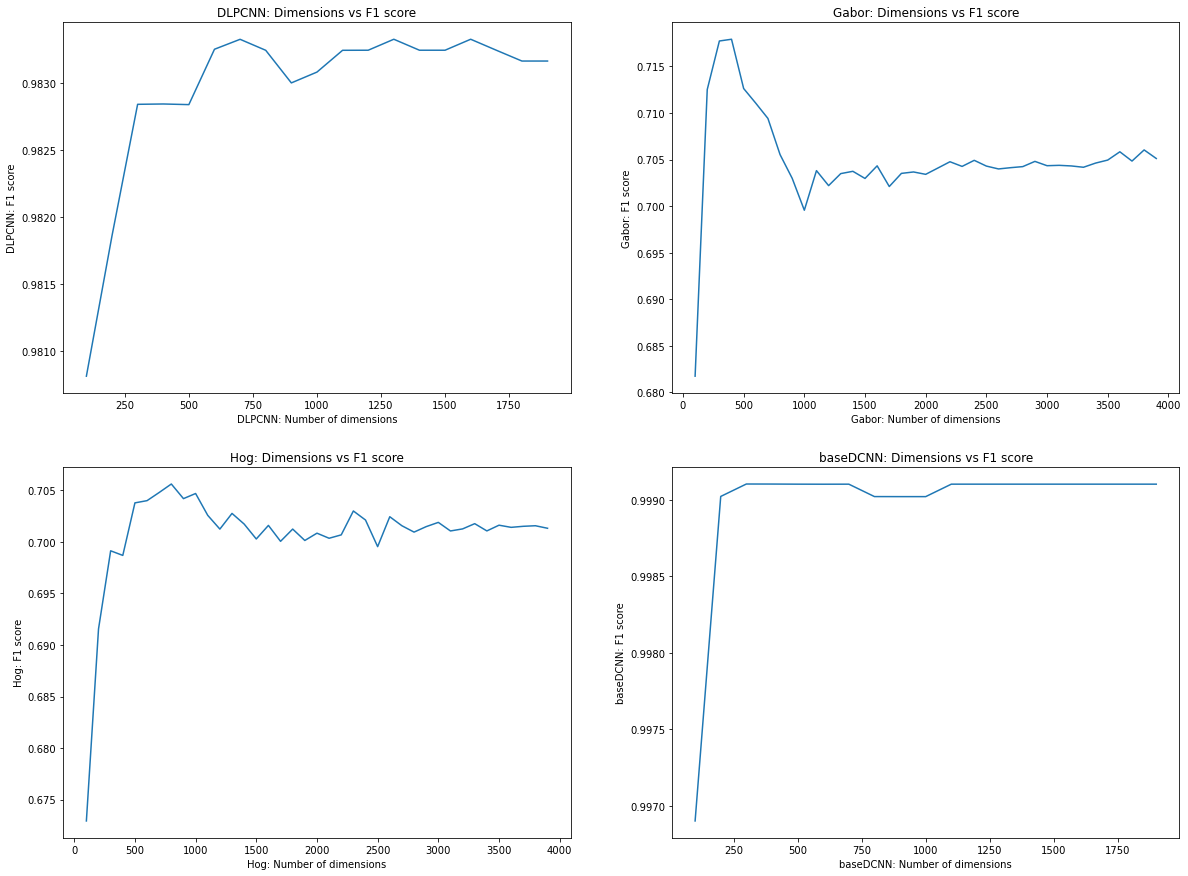

In [93]:
# knee plot
fig, axs = plt.subplots(2, 2)
fig.set_size_inches([20,15])

axs[0, 0].plot(df_search_results_DLPCNN['param_pca__n_components'], df_search_results_DLPCNN['mean_test_f1_weighted'])
axs[0, 0].set_title('DLPCNN: Dimensions vs F1 score')
axs[0, 0].set_xlabel('DLPCNN: Number of dimensions')
axs[0, 0].set_ylabel('DLPCNN: F1 score')

axs[0, 1].plot(df_search_results_Gabor['param_pca__n_components'], df_search_results_Gabor['mean_test_f1_weighted'])
axs[0, 1].set_title('Gabor: Dimensions vs F1 score')
axs[0, 1].set_xlabel('Gabor: Number of dimensions')
axs[0, 1].set_ylabel('Gabor: F1 score')

axs[1, 0].plot(df_search_results_Hog['param_pca__n_components'], df_search_results_Hog['mean_test_f1_weighted'])
axs[1, 0].set_title('Hog: Dimensions vs F1 score')
axs[1, 0].set_xlabel('Hog: Number of dimensions')
axs[1, 0].set_ylabel('Hog: F1 score')

axs[1, 1].plot(df_search_results_baseDCNN['param_pca__n_components'], df_search_results_baseDCNN['mean_test_f1_weighted'])
axs[1, 1].set_title('baseDCNN: Dimensions vs F1 score')
axs[1, 1].set_xlabel('baseDCNN: Number of dimensions')
axs[1, 1].set_ylabel('baseDCNN: F1 score')
